In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# To show plots inline
%matplotlib inline

In [6]:
# Replace this with your actual CSV path if needed
df = pd.read_csv('box_office_data.csv')

# Show first few rows
df.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [44]:
# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Genres', 'Release Group'])

# Reset index
df.reset_index(drop=True, inplace=True)

# Show cleaned sample
df[['Release Group', 'Genres']].head()

,Release Group,Genres
0,Mission: Impossible II,"Adventure, Action, Thriller"
1,Gladiator,"Action, Drama, Adventure"
2,Cast Away,"Adventure, Drama"
3,What Women Want,"Comedy, Romance"
4,Dinosaur,"Animation, Family, Adventure"


In [46]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment to title
df['Title_Sentiment'] = df['Release Group'].apply(get_sentiment)

df[['Release Group', 'Title_Sentiment']].head()

,Release Group,Title_Sentiment
0,Mission: Impossible II,-0.666667
1,Gladiator,0.000000
2,Cast Away,0.000000
3,What Women Want,0.000000
4,Dinosaur,0.000000


In [48]:
# Compute sentiment polarity from movie titles using TextBlob
df_exploded['Title_Sentiment'] = df_exploded['Release Group'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Drop rows with NaNs if any were introduced
df_exploded.dropna(subset=['Title_Sentiment'], inplace=True)

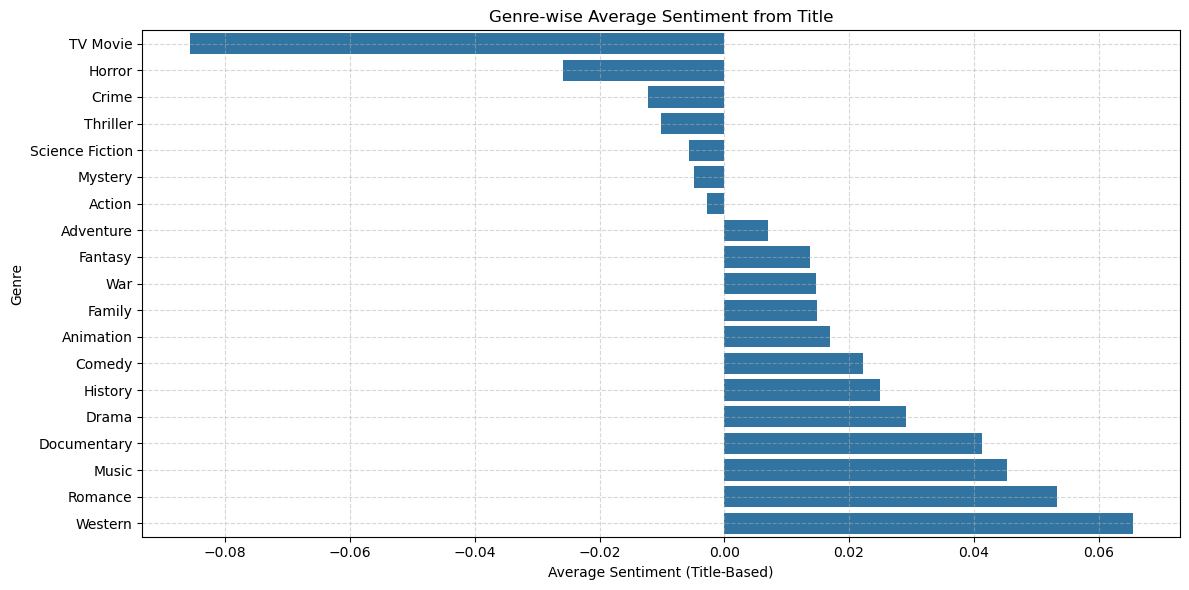

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sentiment_df, x='Average_Sentiment', y='Genre')
plt.title('Genre-wise Average Sentiment from Title')
plt.xlabel('Average Sentiment (Title-Based)')
plt.ylabel('Genre')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

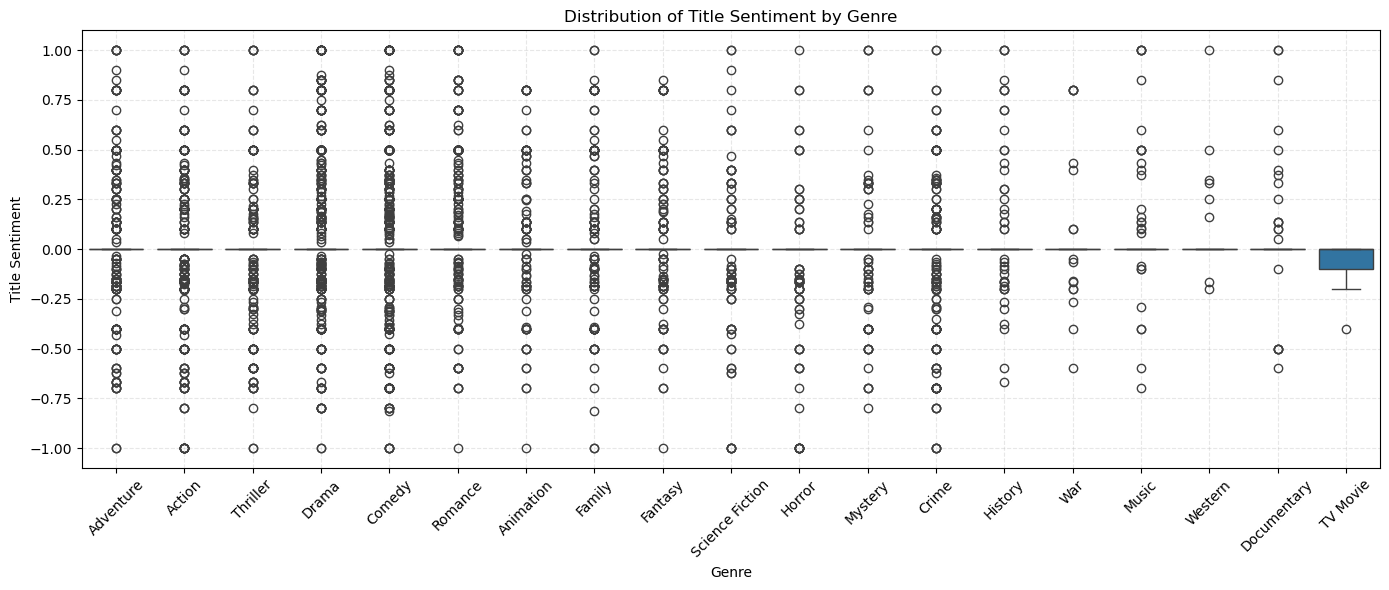

In [52]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_exploded, x='Genre', y='Title_Sentiment')
plt.xticks(rotation=45)
plt.title('Distribution of Title Sentiment by Genre')
plt.xlabel('Genre')
plt.ylabel('Title Sentiment')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()